In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib as mp


In [5]:
df = pd.read_excel('/Users/bharathsingh/Desktop/python project/data /Copy of loan.xlsx')

In [6]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [11]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
df["Married"].fillna(df["Married"].mode()[0],inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace = True)

In [12]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


/var/folders/g3/3xkwm8r910g624xvrt06n9rr0000gn/T/ipykernel_29332/239212044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount_log)


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

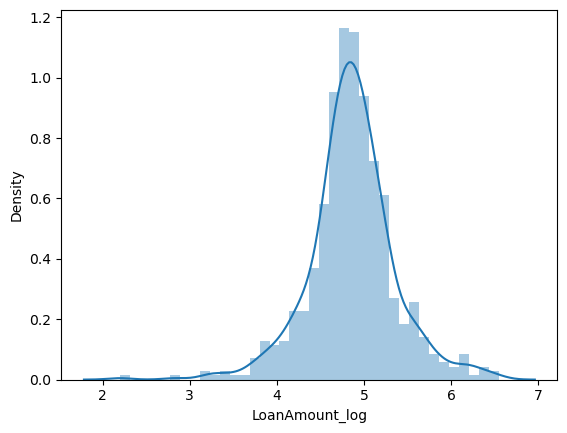

In [14]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
sns.distplot(df.LoanAmount_log)

<Axes: xlabel='Total_Income_log', ylabel='Count'>

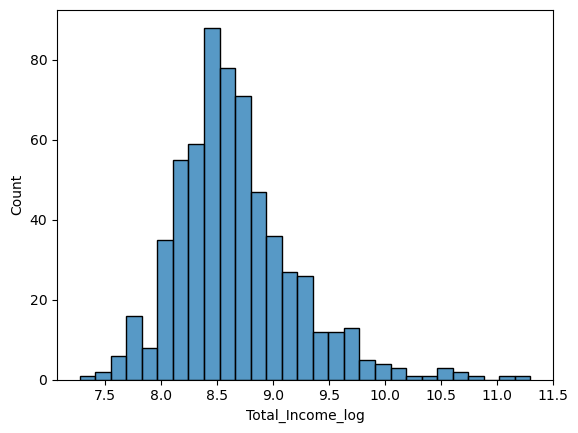

In [15]:
df["Total_Income_log"] = np.log(df["Total_Income"])
sns.histplot(df.Total_Income_log)

Number of people who took the loan by Gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

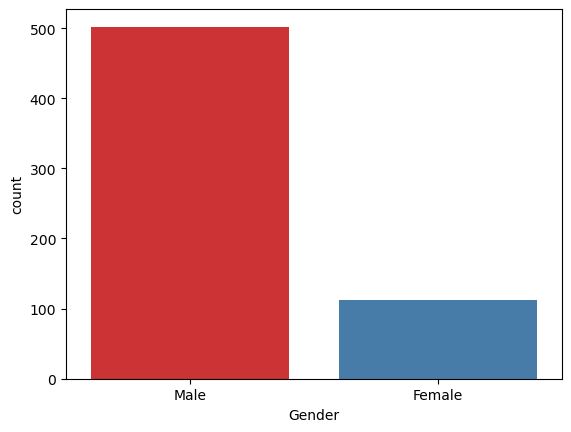

In [16]:
print("Number of people who took the loan by Gender")
print(df['Gender'].value_counts())
sns.countplot(x=df["Gender"],data = df,palette = "Set1")

Number of people who took the loan by Marrital status
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

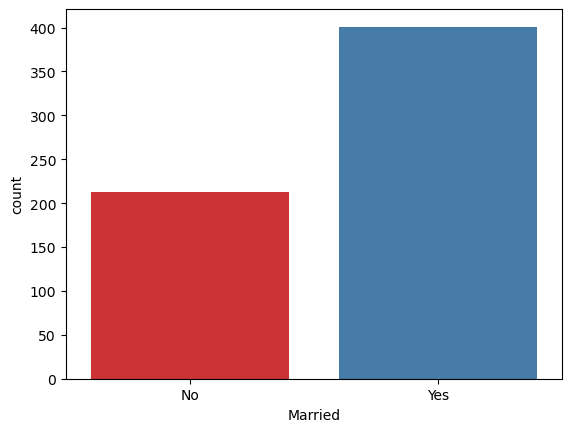

In [17]:
print("Number of people who took the loan by Marrital status")
print(df["Married"].value_counts())
sns.countplot(x = df.Married,data = df,palette = "Set1")

Number of people who has taken loan by Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

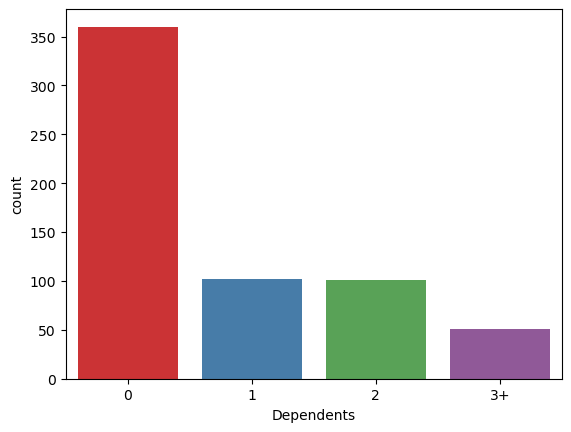

In [18]:
print('Number of people who has taken loan by Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x=df['Dependents'],data=df,palette='Set1')

Number of person who took the loan by self Employment
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

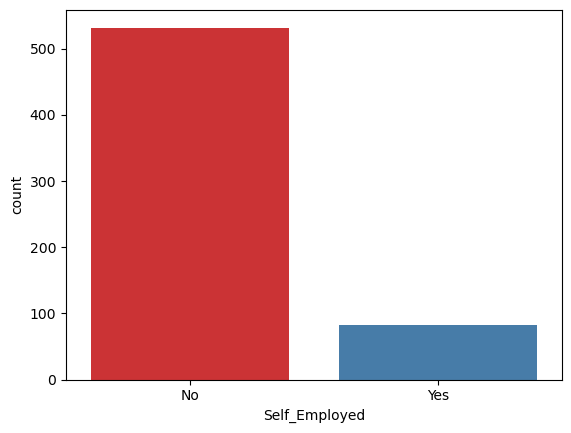

In [19]:
print("Number of person who took the loan by self Employment")
print(df.Self_Employed.value_counts())
sns.countplot(x= df.Self_Employed,data = df,palette = "Set1")

In [20]:
correlation = df.corr()

/var/folders/g3/3xkwm8r910g624xvrt06n9rr0000gn/T/ipykernel_29332/3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [21]:
print(correlation)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.038801   
Credit_History           -0.014477          -0.001665   -0.007738   
Total_Income              0.893037           0.342781    0.620102   
LoanAmount_log            0.434849           0.204179    0.895324   
Total_Income_log          0.717829           0.383827    0.687552   

                   Loan_Amount_Term  Credit_History  Total_Income  \
ApplicantIncome           -0.045242       -0.014477      0.893037   
CoapplicantIncome         -0.059675       -0.001665      0.342781   
LoanAmount                 0.038801       -0.007738      0.620102   
Loan_Amount_Term           1.000000        0.001395     -0.069830   
Credit_History             0.0013

<Axes: >

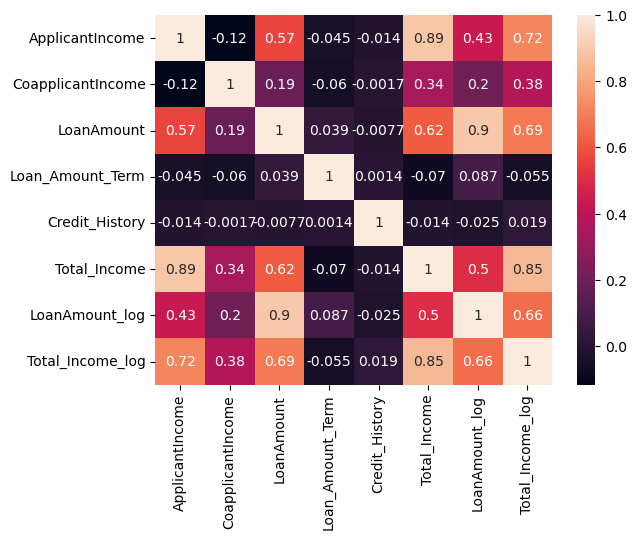

In [22]:
sns.heatmap(correlation,annot=True)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
df["Loan_Status "] = le.fit_transform(df.Loan_Status )

In [26]:
df["Loan_Amount_Term_log"] = np.log(df.Loan_Amount_Term)
df["Loan_Amount_log"] = np.log(df.LoanAmount)

In [27]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,Loan_Status,Loan_Amount_Term_log,Loan_Amount_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,8.674026,1,5.886104,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.714568,0,5.886104,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,1,5.886104,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,1,5.886104,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,1,5.886104,4.948760


In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,Loan_Status,Loan_Amount_Term_log,Loan_Amount_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,8.674026,1,5.886104,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.714568,0,5.886104,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,1,5.886104,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,1,5.886104,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,1,5.886104,4.948760


In [29]:
df['Dependents'] = df['Dependents'].astype(str)

In [30]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']

for col in cols:
    df[col]=le.fit_transform(df[col])

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,Loan_Status,Loan_Amount_Term_log,Loan_Amount_log
0,1,0,0,0,0,1.0,2,1,4.986426,8.674026,1,5.886104,4.986426
1,1,1,1,0,0,1.0,0,0,4.852030,8.714568,0,5.886104,4.852030
2,1,1,0,0,1,1.0,2,1,4.189655,8.006368,1,5.886104,4.189655
3,1,1,0,1,0,1.0,2,1,4.787492,8.505323,1,5.886104,4.787492
4,1,0,0,0,0,1.0,2,1,4.948760,8.699515,1,5.886104,4.948760


In [32]:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[43,  0],
       [ 0, 80]])

In [44]:
accuracy_score(y_test, y_pred)

1.0

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy*100

100.0

In [48]:
score=cross_val_score(dtc,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[1. 1. 1. 1. 1.]
mean score : 100.0


In [49]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy*100

100.0

In [50]:
score=cross_val_score(rfc,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[1. 1. 1. 1. 1.]
mean score : 100.0


In [51]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.959349593495935

In [52]:
score=cross_val_score(knn,X,y,cv=5)
print(score)
print(f"mean score : {np.mean(score)*100}")

[0.93495935 0.93495935 0.95121951 0.94308943 0.96721311]
mean score : 94.62881514061043
